In [1]:
import warnings
import numpy as np
import numba
import matplotlib.pyplot as plt
import hist
s = hist.tag.Slicer()

from coffea import util

In [2]:
from cycler import cycler
default_cycler = (cycler(linestyle=['-', '--',':'])*
                  cycler(color=['sienna','green','red','cyan','darkorange','blue','goldenrod','darkviolet','lime','magenta']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

In [3]:
points = ['cHbox=1.0',
          'cHDD=1.0',
          'cHj1=1.0',
          'cHj3=1.0',
          'cHu=1.0',
          'cHd=1.0',
          'cHudRe=1.0',
          'cuWRe=1.0',
          'cuBRe=1.0',
          'cdWRe=1.0',
          'cdBRe=1.0',
          'cHW=1.0',
          'cHB=1.0',
          'cHWB=1.0',
          'cHudIm=1.0',
          'cuWIm=1.0',
          'cutbd1Im=1.0',
          'cuBIm=1.0',
          'cdBIm=1.0',
          'cHWtil=1.0',
          'cHBtil=1.0',
          'cHWBtil=1.0',
          'SM'
         ]

In [4]:
samp = "VBF_SMEFTsim_topU3l"
output = util.load("coffea/"+samp+"_NP1.coffea")

In [12]:
def plot_with_ratio(h,rebin=1):
    fig, ax = plt.subplots(2,1,sharex=True)
    fig.subplots_adjust(hspace=0)
    
    var = h.axes[0].name
    h = h[{var:s[::hist.rebin(rebin)]}]
    
    for p in points:
    
        h1 = h[{'wc':p}]
            
        h1 = h1/h1.sum()
        h1.plot(overlay='wc',ax=ax[0],label=p)
            
        h2 = h1/h[{'wc':'SM'}]*h[{'wc':'SM'}].sum()
        h2.plot(overlay='wc',ax=ax[1])
        
    ax[0].set_ylabel('Events (normalized)')
    ax[1].set_ylabel('Ratio')
    ax[1].set_ylim(0,2)
    
    fig.legend(ncols=2,frameon=False,bbox_to_anchor=(1.5,0.8),title=samp)
    fig.savefig("figures/"+samp+"_"+var+".png")

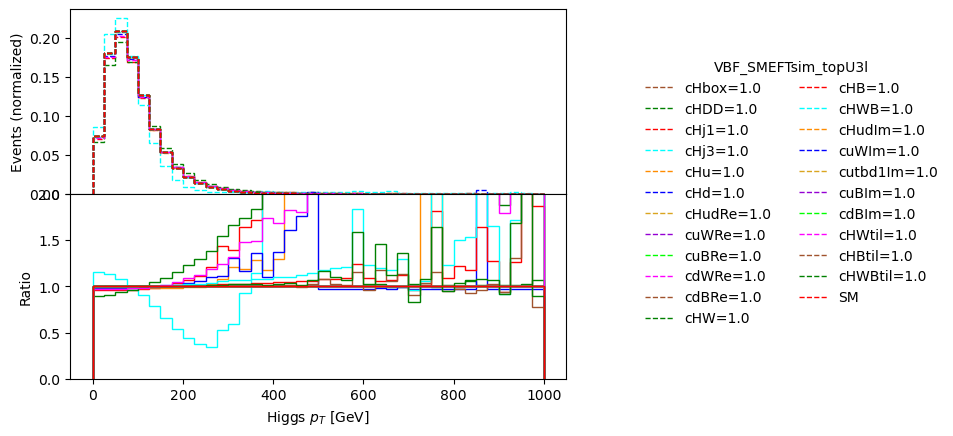

In [13]:
h = output['hpt']
plot_with_ratio(h,rebin=5)

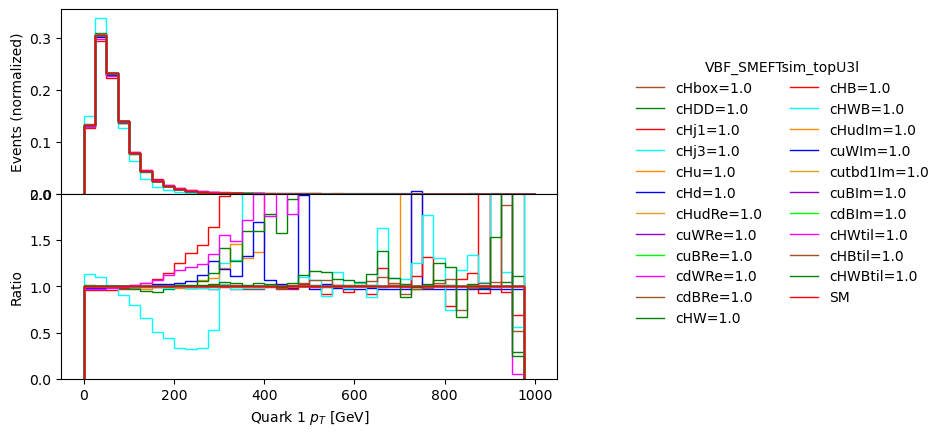

In [7]:
h = output['q1pt']
plot_with_ratio(h,rebin=5)

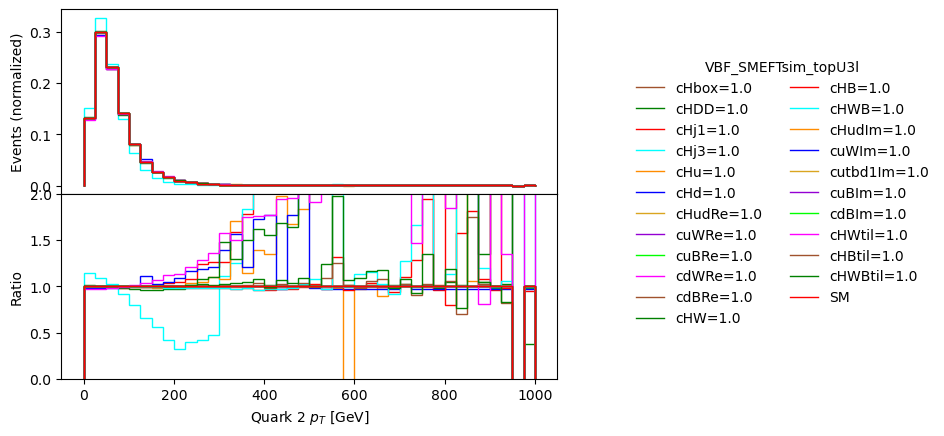

In [8]:
h = output['q2pt']
plot_with_ratio(h,rebin=5)

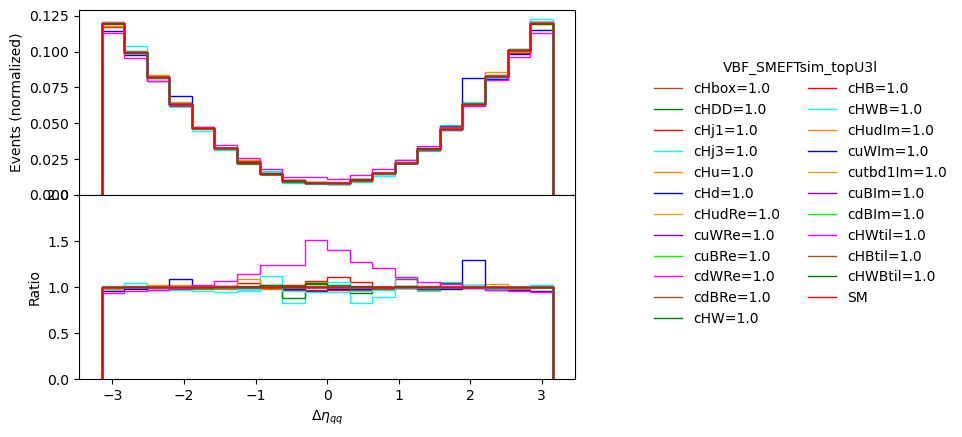

In [9]:
h = output['detaqq']
plot_with_ratio(h,rebin=10)

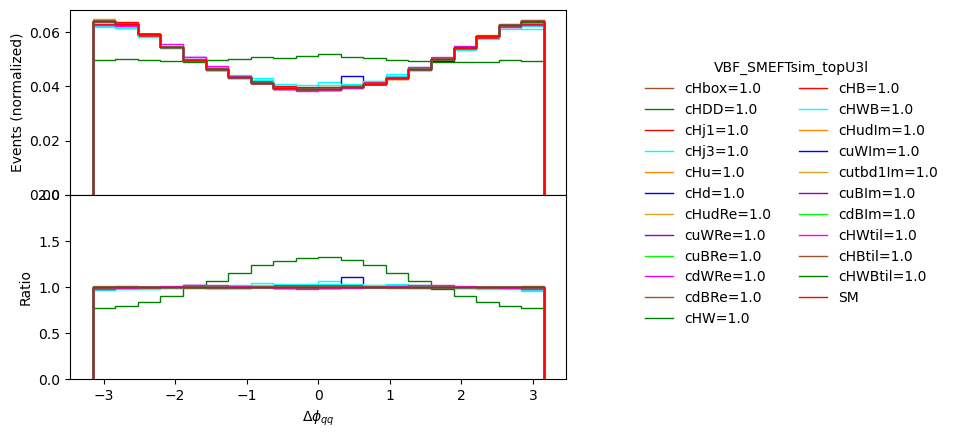

In [10]:
h = output['dphiqq']
plot_with_ratio(h,rebin=10)

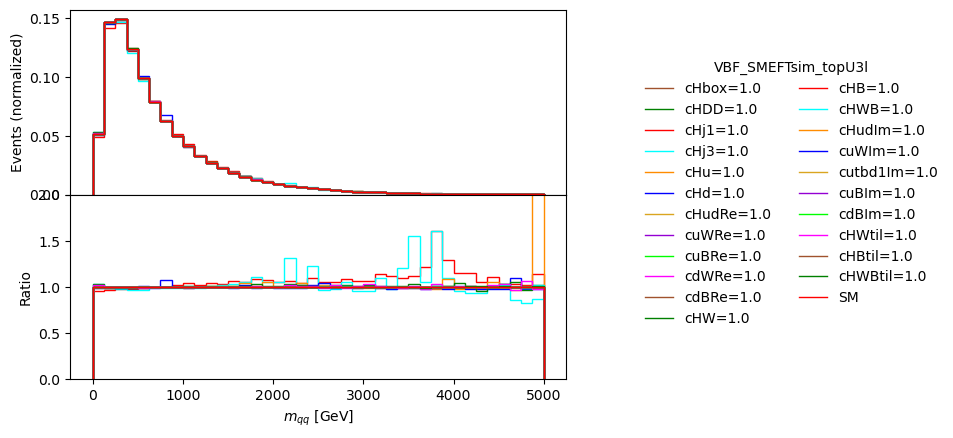

In [11]:
h = output['mqq']
plot_with_ratio(h,rebin=5)